# Sentiment Analysis Model Training

This notebook demonstrates the training process for both Vietnamese and English sentiment analysis models.

In [9]:
%pip install utils

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'sentiment_analysis'))
sys.path.append(project_root)

from src.config import Config
from src.data.data_loader import DataLoader
from src.data.preprocessor import DataPreprocessor
from src.features.feature_engineering import FeatureExtractor
from src.models.model_trainer import EnhancedModelTrainer
from src.utils.evaluation import ModelEvaluator

You should consider upgrading via the 'c:\Users\tamaisme\Desktop\Projects\PYTHON\PROJECT\sentiment_analysis\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## 1. Load and Prepare Data

In [10]:
def load_and_prepare_data(language: str):
    config = Config()
    data_loader = DataLoader(config)
    preprocessor = DataPreprocessor(language, config)
    
    # Load data
    print(f"Loading {language} data...")
    df = data_loader.load_data(language)
    print(f"Raw data shape: {df.shape}")
    
    # Preprocess
    processed_df = preprocessor.preprocess(df)
    print(f"Processed data shape: {processed_df.shape}")
    
    # Display class distribution
    plt.figure(figsize=(8, 5))
    processed_df['label'].value_counts().plot(kind='bar')
    plt.title(f'Class Distribution - {language.upper()}')
    plt.show()
    
    return processed_df, config

### Vietnamese Data

Loading vi data...
2024-11-11 03:39:33,120 - src.data.data_loader - INFO - Valid samples after validation: 5000
2024-11-11 03:39:33,120 - src.data.data_loader - INFO - Valid samples after validation: 5000
2024-11-11 03:39:33,120 - src.data.data_loader - INFO - Valid samples after validation: 5000
2024-11-11 03:39:33,120 - src.data.data_loader - INFO - Valid samples after validation: 5000
2024-11-11 03:39:33,120 - src.data.data_loader - INFO - Valid samples after validation: 5000
Raw data shape: (5000, 2)
2024-11-11 03:39:33,126 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-11 03:39:33,126 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-11 03:39:33,126 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-11 03:39:33,126 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-11 03:39:33,126 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-11 03:39:35,701 - src.data.preprocessor - INFO - Preprocessed 4984 valid

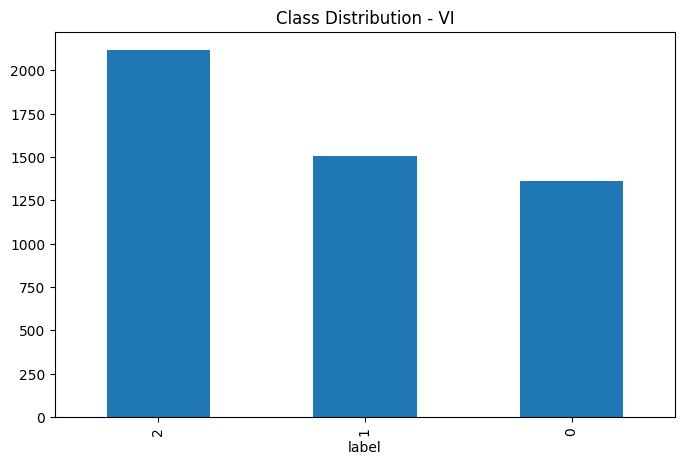

In [11]:
vi_df, config = load_and_prepare_data('vi')

### English Data

Loading en data...
2024-11-11 03:39:35,815 - src.data.data_loader - WARNING - No valid data after validation
2024-11-11 03:39:35,815 - src.data.data_loader - WARNING - No valid data after validation
2024-11-11 03:39:35,815 - src.data.data_loader - WARNING - No valid data after validation
2024-11-11 03:39:35,815 - src.data.data_loader - WARNING - No valid data after validation
2024-11-11 03:39:35,815 - src.data.data_loader - WARNING - No valid data after validation
2024-11-11 03:39:35,815 - src.data.data_loader - WARNING - No valid data after validation
Raw data shape: (0, 2)
2024-11-11 03:39:35,821 - src.data.preprocessor - INFO - Preprocessing en data...
2024-11-11 03:39:35,821 - src.data.preprocessor - INFO - Preprocessing en data...
2024-11-11 03:39:35,821 - src.data.preprocessor - INFO - Preprocessing en data...
2024-11-11 03:39:35,821 - src.data.preprocessor - INFO - Preprocessing en data...
2024-11-11 03:39:35,821 - src.data.preprocessor - INFO - Preprocessing en data...
2024-11-

IndexError: index 0 is out of bounds for axis 0 with size 0

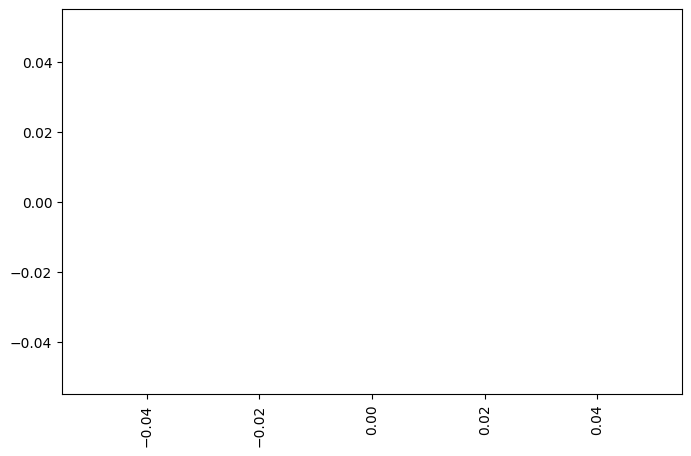

In [12]:
en_df, _ = load_and_prepare_data('en')

## 2. Feature Engineering

In [ ]:
def extract_features(df: pd.DataFrame, language: str, config: Config):
    feature_extractor = FeatureExtractor(language, config)
    data_loader = DataLoader(config)
    
    # Split data
    train_df, test_df = data_loader.split_data(df)
    
    # Get features and labels
    X_train, y_train = data_loader.get_features_and_labels(train_df)
    X_test, y_test = data_loader.get_features_and_labels(test_df)
    
    # Extract features
    print(f"Extracting features for {language}...")
    X_train_features = feature_extractor.extract_features(X_train)
    X_test_features = feature_extractor.extract_features(X_test)
    
    return X_train_features, X_test_features, y_train, y_test

In [ ]:
# Ensure 'feature_extraction' key exists
if 'feature_extraction' not in config.LANGUAGE_CONFIGS['vi']:
	config.LANGUAGE_CONFIGS['vi']['feature_extraction'] = {}
if 'feature_extraction' not in config.LANGUAGE_CONFIGS['en']:
	config.LANGUAGE_CONFIGS['en']['feature_extraction'] = {}

# Adjust feature extraction parameters
config.LANGUAGE_CONFIGS['vi']['feature_extraction']['min_df'] = 0.0001
config.LANGUAGE_CONFIGS['vi']['feature_extraction']['max_df'] = 0.95
config.LANGUAGE_CONFIGS['en']['feature_extraction']['min_df'] = 0.0001
config.LANGUAGE_CONFIGS['en']['feature_extraction']['max_df'] = 0.95

# Vietnamese features
X_train_vi, X_test_vi, y_train_vi, y_test_vi = extract_features(vi_df, 'vi', config)

# English features
X_train_en, X_test_en, y_train_en, y_test_en = extract_features(en_df, 'en', config)

## 3. Model Training and Evaluation

In [ ]:
def train_and_evaluate(X_train, X_test, y_train, y_test, language: str, config: Config):
    # Train model
    trainer = EnhancedModelTrainer(language, config)
    model = trainer.train_with_grid_search(X_train, y_train)
    
    # Evaluate
    evaluator = ModelEvaluator(language)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    results = evaluator.evaluate(y_test, y_pred, y_prob)
    print(f"\nResults for {language.upper()}:")
    print(results['classification_report'])
    
    return model

### Train Vietnamese Model

In [ ]:
vi_model = train_and_evaluate(X_train_vi, X_test_vi, y_train_vi, y_test_vi, 'vi', config)

### Train English Model

In [ ]:
en_model = train_and_evaluate(X_train_en, X_test_en, y_train_en, y_test_en, 'en', config)

## 4. Save Models

In [ ]:
import joblib

# Save Vietnamese model
vi_model_path = config.LANGUAGE_CONFIGS['vi']['model_path']
os.makedirs(os.path.dirname(vi_model_path), exist_ok=True)
joblib.dump(vi_model, vi_model_path)
print(f"Vietnamese model saved to {vi_model_path}")

# Save English model
en_model_path = config.LANGUAGE_CONFIGS['en']['model_path']
os.makedirs(os.path.dirname(en_model_path), exist_ok=True)
joblib.dump(en_model, en_model_path)
print(f"English model saved to {en_model_path}")